In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [18]:
ls = glob.glob('ensemble/*.csv')
names = []
for s in ls:
    names.append(s.replace('ensemble/', ""))
names.sort(reverse=True)
names
ls.sort(reverse=True)
ls

['ensemble/74105.csv',
 'ensemble/74079.csv',
 'ensemble/73986.csv',
 'ensemble/73980.csv',
 'ensemble/73977.csv',
 'ensemble/73872.csv',
 'ensemble/73837.csv',
 'ensemble/73539.csv',
 'ensemble/73500.csv',
 'ensemble/73355.csv',
 'ensemble/73321.csv',
 'ensemble/73251.csv',
 'ensemble/73034.csv',
 'ensemble/73010.csv',
 'ensemble/72934.csv',
 'ensemble/72912.csv',
 'ensemble/71362.csv']

In [19]:
sota = pd.read_csv(ls[0])
to_compare = []
for comp in ls[1:]:
    to_compare.append(pd.read_csv(comp))


froms = []
for n, labels in enumerate(to_compare):
    froms += [names[n+1]] * len(labels)
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'org:product'),
  Text(1, 0, 'per:alternate_names'),
  Text(2, 0, 'no_relation'),
  Text(3, 0, 'per:employee_of'),
  Text(4, 0, 'per:spouse'),
  Text(5, 0, 'org:members'),
  Text(6, 0, 'org:top_members/employees'),
  Text(7, 0, 'org:dissolved'),
  Text(8, 0, 'per:colleagues'),
  Text(9, 0, 'org:place_of_headquarters'),
  Text(10, 0, 'per:place_of_residence'),
  Text(11, 0, 'org:member_of'),
  Text(12, 0, 'per:title'),
  Text(13, 0, 'per:date_of_birth'),
  Text(14, 0, 'per:place_of_death'),
  Text(15, 0, 'per:place_of_birth'),
  Text(16, 0, 'org:number_of_employees/members'),
  Text(17, 0, 'per:children'),
  Text(18, 0, 'per:product'),
  Text(19, 0, 'per:siblings'),
  Text(20, 0, 'per:origin'),
  Text(21, 0, 'org:alternate_names'),
  Text(22, 0, 'org:political/religious_affiliation'),
  Text(23, 0, 'org:founded'),
  Text(24, 0, 'per:paren

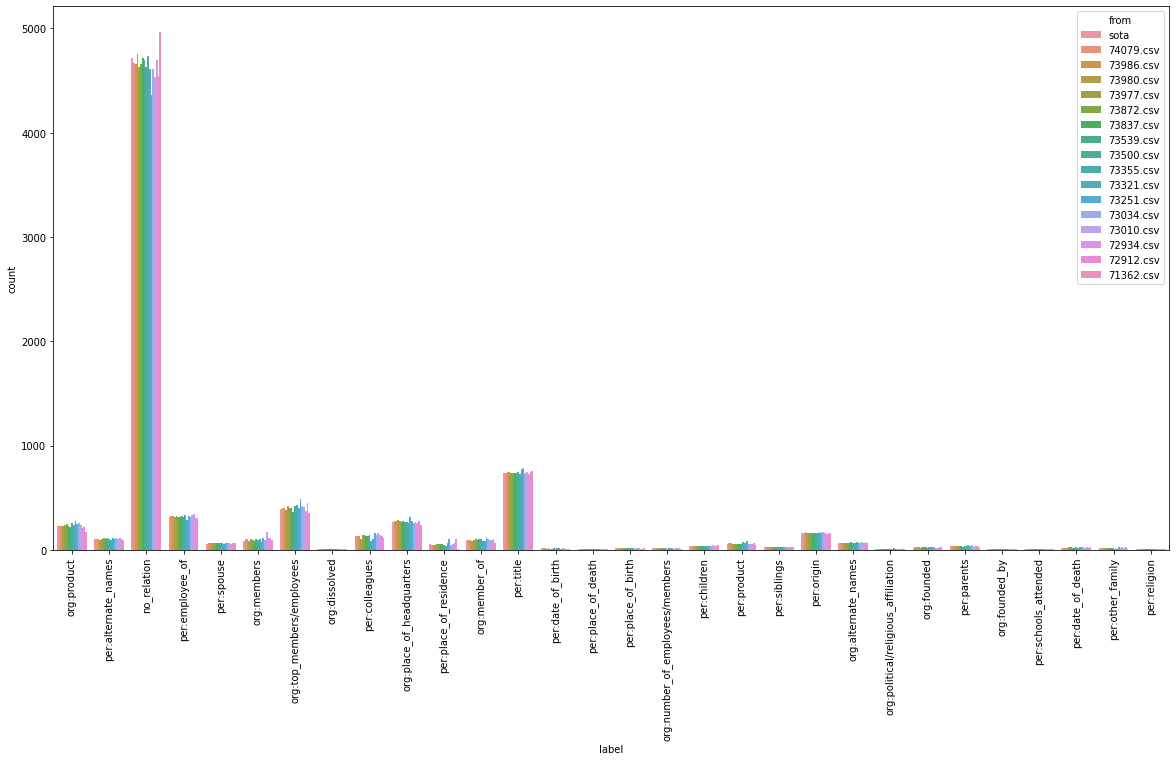

In [20]:
concated = pd.concat(to_compare, ignore_index=True)

df = pd.DataFrame({
    'label': pd.concat([sota['pred_label']] + list(map(lambda x: x['pred_label'], to_compare)), ignore_index=True),
    'from': ['sota'] * len(sota['pred_label']) + froms
})

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot = sns.countplot(x='label', data=df, hue='from', ax=ax)
plt.xticks(rotation=90)

In [21]:
for n, comp in enumerate(to_compare):
    print(names[n+1])
    freq = (sota['pred_label'] == comp['pred_label']).value_counts()
    print("Different # with SOTA", freq.loc[0])
    #print(freq)
    print()

74079.csv
Different # with SOTA 189

73986.csv
Different # with SOTA 218

73980.csv
Different # with SOTA 207

73977.csv
Different # with SOTA 195

73872.csv
Different # with SOTA 258

73837.csv
Different # with SOTA 128

73539.csv
Different # with SOTA 404

73500.csv
Different # with SOTA 336

73355.csv
Different # with SOTA 470

73321.csv
Different # with SOTA 480

73251.csv
Different # with SOTA 643

73034.csv
Different # with SOTA 328

73010.csv
Different # with SOTA 458

72934.csv
Different # with SOTA 465

72912.csv
Different # with SOTA 493

71362.csv
Different # with SOTA 677



In [71]:
freq

True     7288
False     477
Name: pred_label, dtype: int64